# A rotating mesh with spots

In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.plots import plot_3D
from spice.spectrum import simulate_observed_flux
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import TransformerPayne
import matplotlib.pyplot as plt
%matplotlib inline

from jax import config

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Gaia:G" has a newer version available.  Run phoebe.list_passband_online_history("Gaia:G") to get a list of available changes and phoebe.update_passband("Gaia:G") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


Let's use the simplest example for the sake of speed - the blackbody flux from the ```transformer_payne``` package.

In [2]:
tp = TransformerPayne.download()

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

This function will add two temperature spherical harmonics.

In [1]:
m = IcosphereModel.construct(1000, 1., 1., tp.to_parameters(), tp.stellar_parameter_names)

NameError: name 'IcosphereModel' is not defined

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

Let's call the ```evaluate``` function to include rotation and calculate models with rotation effects for various rotation phases.

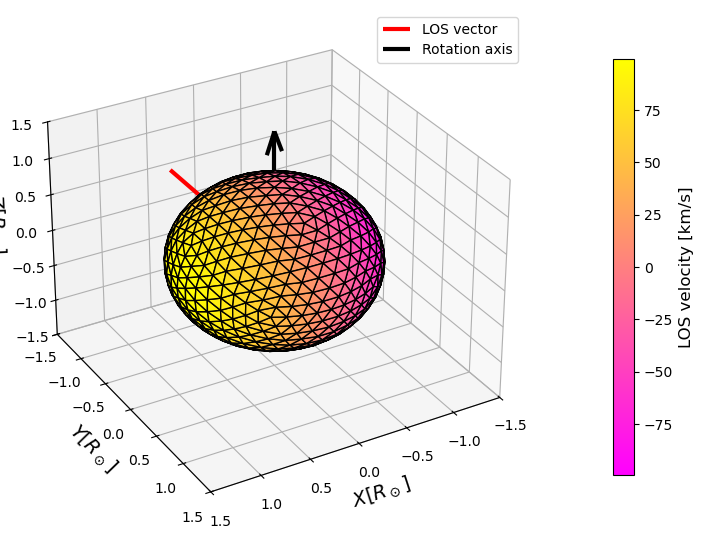

In [4]:
mt = add_rotation(m, 100, jnp.array([0., 0., 1.]))
mt = evaluate_rotation(mt, 0.)

fig, plot_ax = plot_3D(mt, 'los_velocities', cmap='spring')
plt.show()

## Spectrum emulation

Now we can simulate the spectrum at the default distance of $d=10$ pc.

In [5]:
vws = np.linspace(4670, 4960, 2000)
spec_no_rot = simulate_observed_flux(tp.intensity, m, jnp.log10(vws))
spec_rot = simulate_observed_flux(tp.intensity, mt, jnp.log10(vws))

/home/100/mj8805/.local/lib/python3.12/site-packages/jax/_src/linear_util.py:193: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in logspace is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  ans = self.f(*args, **dict(self.params, **kwargs))
/home/100/mj8805/.local/lib/python3.12/site-packages/jax/_src/numpy/lax_numpy.py:6337: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  start = asarray(start, dtype=computation_dtype)
/home/100/mj8805/.local/lib/python3.12/site-packages/jax/_src/numpy/lax_numpy.py:6338: UserWarning:

Let's plot the subset to see the change of the line more clearly.

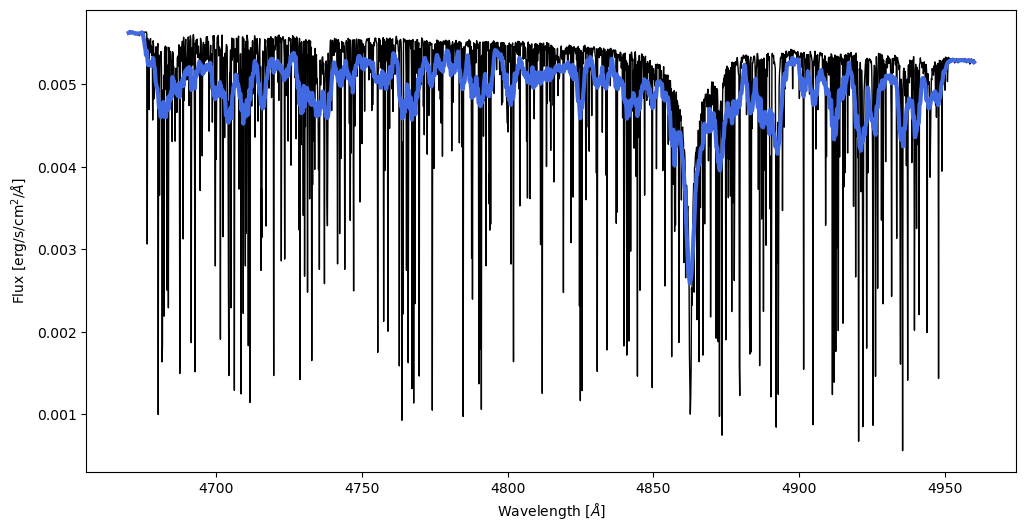

In [6]:
_, ax = plt.subplots(figsize=(12, 6))
# Plot the spectra with colors based on timesteps
plt.plot(vws, spec_no_rot[:, 0], color='black', linewidth=1)
plt.plot(vws, spec_rot[:, 0], color='royalblue', linewidth=3)
# Add a colorbar
ax.set_xlabel(r'Wavelength [$\AA$]')
ax.set_ylabel(r'Flux [erg/s/cm$^2$/$\AA$]');
plt.show()